Here are the package that we need to use:

In [1]:
import os
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In this function, we load the image using opencv, and coonvert the image's color to gray. What's more, we also set the width and height of the image, because we want to make sure that our 2 computing images have the same numbers of pixels, so that we can calculate the pdf even 2 input images have different size. And here you can set the width and height yourself, even if you want height and width to have a relation.

In [2]:
width = 256
height = 256
size = (height, width)
def load_image_with_opencv(file_path, size=None):
    # Read the image file
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

    # Convert from BGR to RGB
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image if a size is provided
    if size is not None:
        img = cv2.resize(img, size)

    return img

This function is to calculate the pdf of 2 images respectively:

In [3]:
def compute_probability_distribution(image):
    # Flatten the image to a 1D array of intensity values
    intensity_values = image.flatten()
    # Calculate the probability of each intensity level
    histogram, _ = np.histogram(intensity_values, bins=512, range=(0, 512), density=True)
    
    return histogram

This function is to calculate the MI of 2 images, by using the calulated pdf and the joint pdf; and then put them in to the formula to do the calculation.

In [4]:
def mutual_information(imageA, imageB):
    # Compute the probability distribution of each image
    pA = compute_probability_distribution(imageA)
    pB = compute_probability_distribution(imageB)
    # Compute the joint probability distribution of both images
    joint_histogram, _, _ = np.histogram2d(imageA.flatten(), imageB.flatten(), bins=512, range=((0, 512), (0, 512)), density=True)
    
    # Calculate the mutual information
    mi = 0
    for i in range(512):
        for j in range(512):
            if joint_histogram[i, j] > 0 and pA[i] > 0 and pB[j] > 0:
                mi += joint_histogram[i, j] * np.log2(joint_histogram[i, j] / (pA[i] * pB[j]))
    
    return mi




# print("image A:")
# imageA=Image.open('1-1.jpg')
# plt.imshow(imageA)
# plt.show()

# print("image B:")
# imageB=Image.open('1-2.jpg')
# plt.imshow(imageB)
# plt.show()


# imageA = load_image_with_opencv('1-1.jpg', size=size)
# imageB = load_image_with_opencv('1-2.jpg', size=size)
# plt.imshow(imageA)
# plt.show()


# mi = mutual_information(imageA, imageB)
# print(f"The mutual information is: {mi}")

Here, we calcuate all the images' MI that in the list "image_paths", by using a loop to form a pair with each of them. Here, since we have 5 images, then we form 25 pairs of MI calculation here. Finally, we form the calculation into a matrix.

In [5]:
# List of file paths for your images
image_paths = ['ljc.jpg', 'jyh.jpg', 'ljh.jpg', 'hjc.jpg', 'ljw.jpg']

# image_paths = ['ljc3.jpg', 'jyh2.jpg', 'ljh2.jpg', 'hjc2.jpg']

# Load all images
images = [load_image_with_opencv(path,size) for path in image_paths]

# Initialize a 5x5 matrix to store the mutual information values
# mi_matrix = np.zeros((5, 5))
mi_matrix = np.zeros((len(image_paths), len(image_paths)))

# Perform the comparisons
for i, imageA in enumerate(images):
    for j, imageB in enumerate(images):
        mi = mutual_information(imageA, imageB)
        mi_matrix[i, j] = mi
        print(f"The mutual information between '{image_paths[i]}' and '{image_paths[j]}' is: {mi}")

# Print the full mutual information matrix
print("Mutual Information Matrix:")
print(mi_matrix)

The mutual information between 'ljc.jpg' and 'ljc.jpg' is: 7.32902046664257
The mutual information between 'ljc.jpg' and 'jyh.jpg' is: 1.2153524135183589
The mutual information between 'ljc.jpg' and 'ljh.jpg' is: 1.52434848575825
The mutual information between 'ljc.jpg' and 'hjc.jpg' is: 1.139496073148584
The mutual information between 'ljc.jpg' and 'ljw.jpg' is: 1.3124861144631015
The mutual information between 'jyh.jpg' and 'ljc.jpg' is: 1.2153524135183662
The mutual information between 'jyh.jpg' and 'jyh.jpg' is: 7.573177955441137
The mutual information between 'jyh.jpg' and 'ljh.jpg' is: 1.3897848773424148
The mutual information between 'jyh.jpg' and 'hjc.jpg' is: 1.3254254807643404
The mutual information between 'jyh.jpg' and 'ljw.jpg' is: 1.139570306551494
The mutual information between 'ljh.jpg' and 'ljc.jpg' is: 1.524348485758243
The mutual information between 'ljh.jpg' and 'jyh.jpg' is: 1.3897848773424162
The mutual information between 'ljh.jpg' and 'ljh.jpg' is: 7.42191732217

Here, by using the matrix we get before, I plot 5 images to show out every images' MI corresponding to other images. Other images includes itself, although it has some redundancies, we can gain some regular by plotting all the comparsion out.

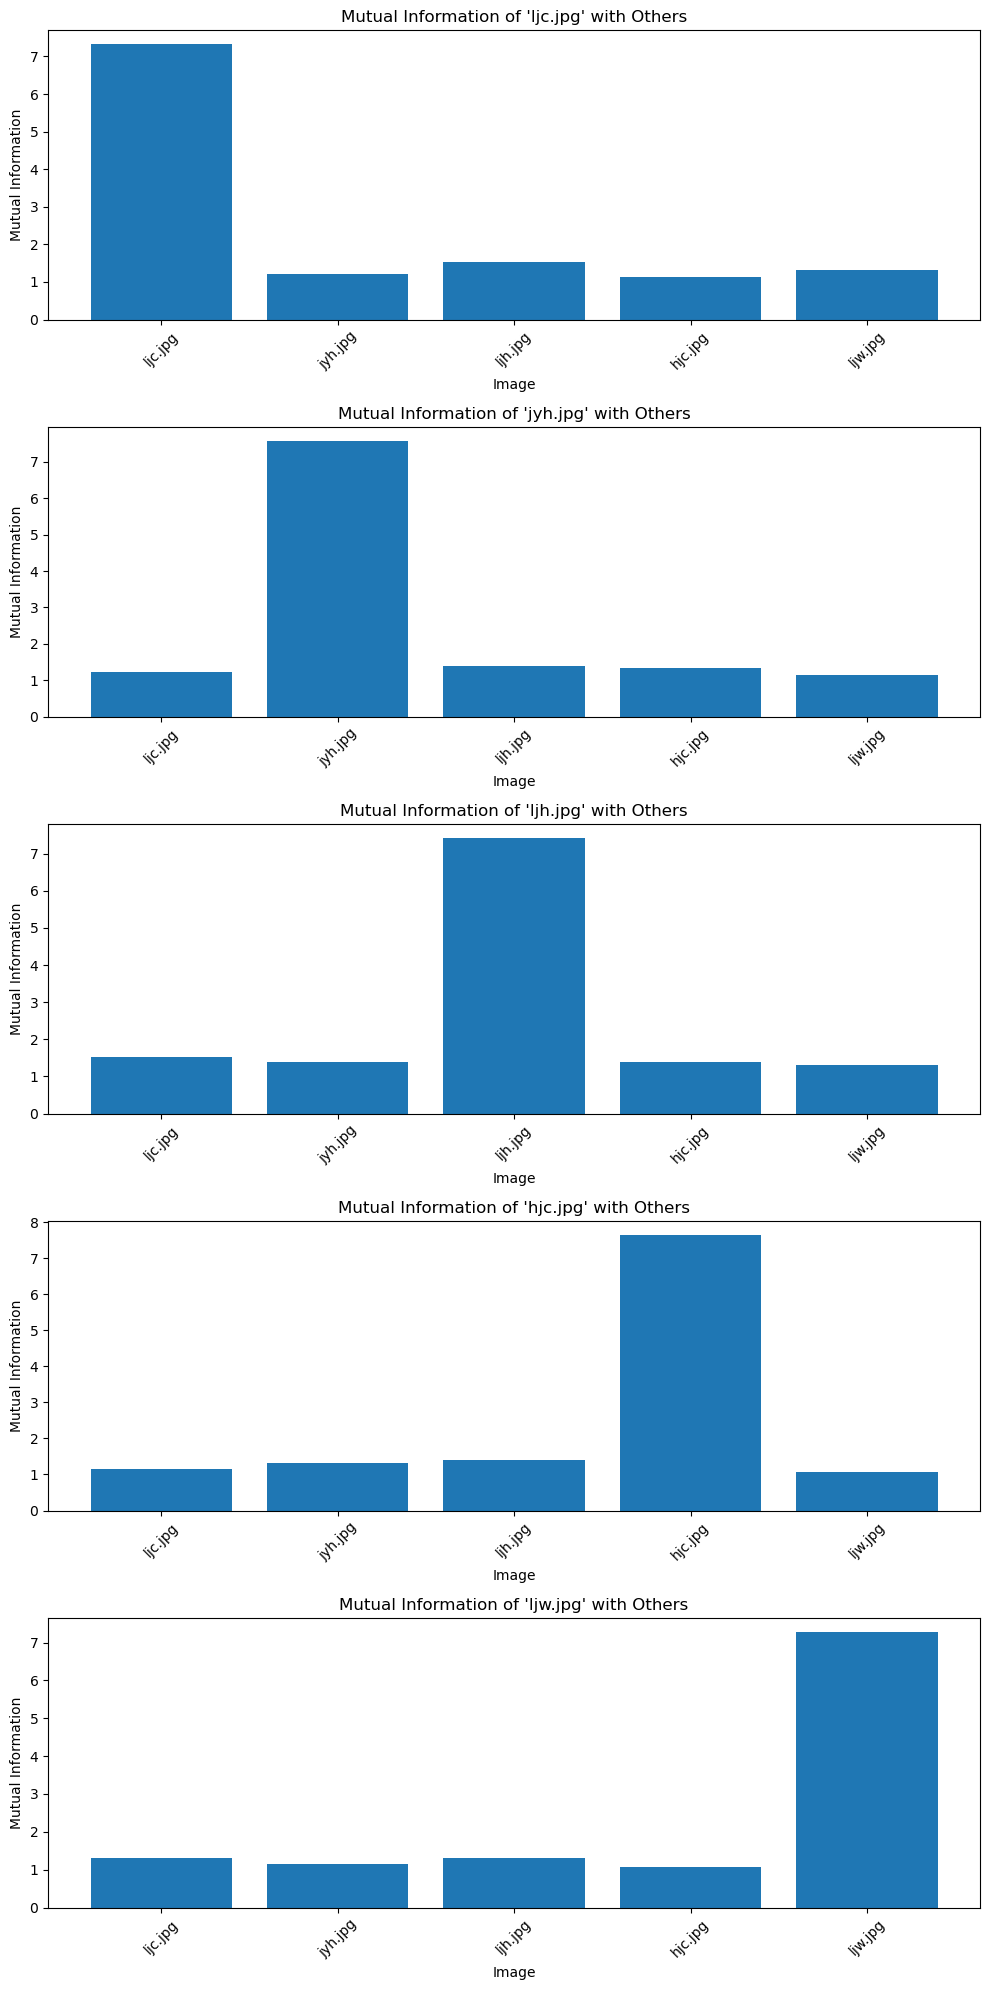

In [6]:
# Number of images
num_images = len(image_paths)

# Create a figure and a set of subplots based on the number of images
fig, axs = plt.subplots(num_images, 1, figsize=(10, 4 * num_images))

# Check if there is only one image, axs will not be an array
if num_images == 1:
    axs = [axs]

# Loop through each image and its corresponding row in mi_matrix
for i in range(num_images):
    axs[i].bar(image_paths, mi_matrix[i, :])
    axs[i].set_title(f"Mutual Information of '{image_paths[i]}' with Others")
    axs[i].set_xlabel("Image")
    axs[i].set_ylabel("Mutual Information")
    axs[i].tick_params(axis='x', rotation=45)  # Rotate x labels for better readability

plt.tight_layout()
plt.show()

Here is we want to show that using MI to compare the appearance vary people to people in different background is awkward, because the every corresponding intensity may be different, though it may has the same size.

In [7]:
imageA = load_image_with_opencv('ljc4.jpg', size=size)
imageB = load_image_with_opencv('ljc5.jpg', size=size)

mi = mutual_information(imageA, imageB)
print(f"The mutual information is: {mi}")

The mutual information is: 0.9372729761252012


Using the MI calculation method in slearn to show that it also get a similar result, to troubleshooting our algorithms and prove our above statement is true.

In [8]:
import cv2
import numpy as np
import sklearn.metrics as skm
 
def hxx_forward(x, y):
    return skm.mutual_info_score(x, y)
 
img1 = cv2.imread("ljc4.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("ljc5.jpg", cv2.IMREAD_GRAYSCALE)

if img1.shape != img2.shape:
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
    
x = np.reshape(img1, -1)
y = np.reshape(img2, -1)

print(hxx_forward(x, y))
 
# plt.imshow(img1)
# plt.show()
# plt.imshow(img2)
# plt.show()

0.3444914199259822
